In [0]:
'''
Exercício #7 – Clusterização as avessas

Ele possui 2 dimensões e está disponível no diretório da disciplina como ClusterizacaoTrabalho.csv.

Utilizando as técnicas vistas em sala de aula, realize a melhor clusterização possível para esse conjunto.

Dicas:
	O conjunto possui muitos ruídos;
	É possível validar visualmente a clusterização dados que o 	conjunto possui apenas 2 dimensões.

'''

In [0]:
#Importando as bibliotecas necessárias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [0]:
#Lendo o arquivo "Cluster Trabalho"
dataset = pd.read_csv('https://dados-leonardo.s3-sa-east-1.amazonaws.com/ClusterizacaoTrabalho.csv', header=0,sep=';')

In [66]:
#Verificando os dados do dataset
dataset.head()

,V1,V2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [13]:
#Verificando valores nulos
dataset.isnull().sum()

V1    0
V2    0
dtype: int64

In [14]:
#Obtendo mais informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
V1    5000 non-null int64
V2    5000 non-null int64
dtypes: int64(2)
memory usage: 78.2 KB


In [67]:
#Obtendo informações estatísticas do Dataset
dataset.describe()

,V1,V2
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


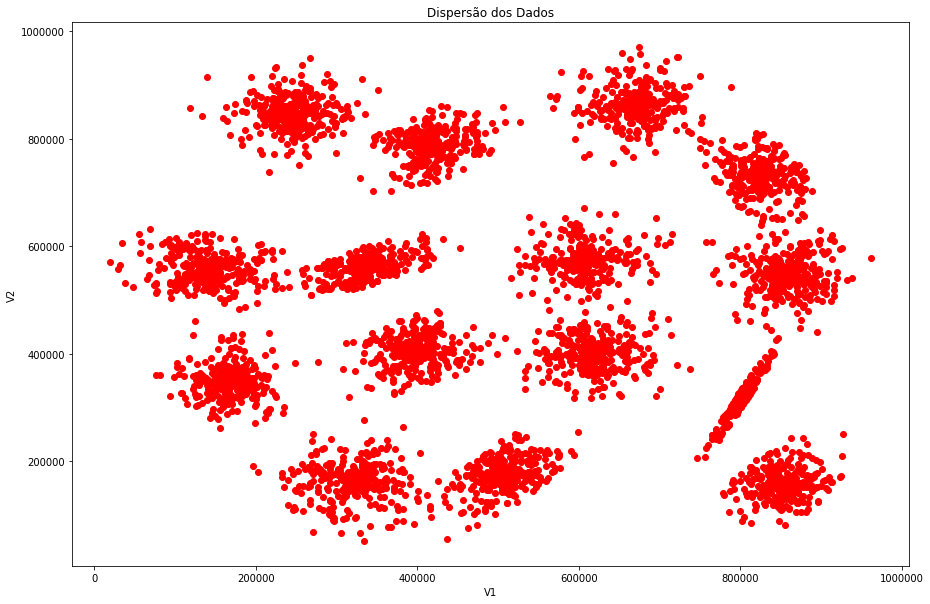

In [68]:
# Verificando a dispersão dos dados

plt.rcParams['figure.figsize'] = (15,10)
plt.title('Dispersão dos Dados')
plt.scatter(dataset['V1'], dataset['V2'], color='r')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [0]:
#Verificando o melhor valor de K (Elbowpoint)
SomaDistQuadradas = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dataset)
    SomaDistQuadradas.append(km.inertia_)

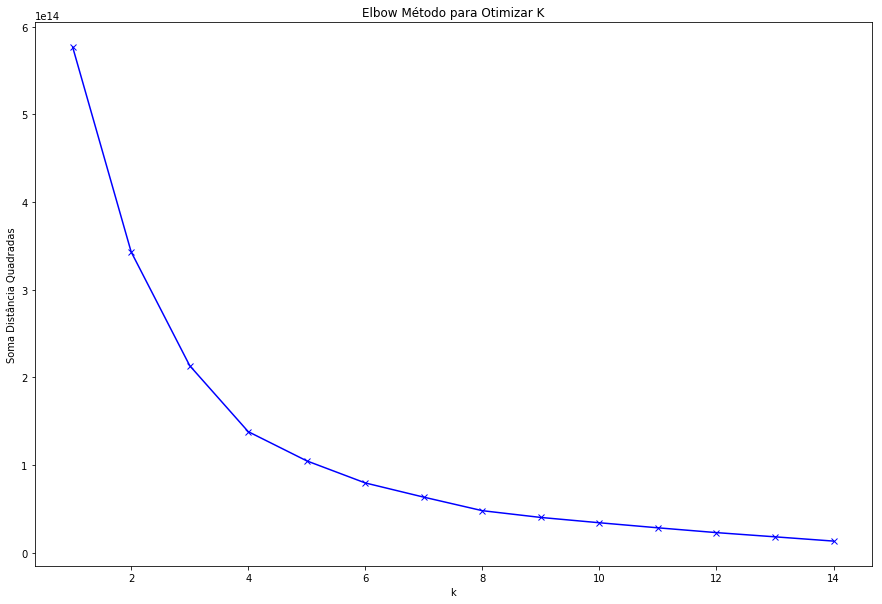

In [70]:
#Plotando o melhor valor de K (Elbowpoint)
plt.rcParams['figure.figsize'] = (15,10)

plt.plot(K, SomaDistQuadradas, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma Distância Quadradas')
plt.title('Elbow Método para Otimizar K')
plt.show()

In [71]:
#CLUSTERIZANDO COM VALOR DE K = 4 (VALOR MAIS INCLINADO NA CURVA Elbowpoint)
kmeans = KMeans(n_clusters=4).fit(dataset)
centroids = kmeans.cluster_centers_
print(centroids)

[[754863.40575397 294012.51091269]
 [348842.67180616 273754.18355359]
 [280979.19126506 687372.9939759 ]
 [741567.88402458 684713.76267281]]


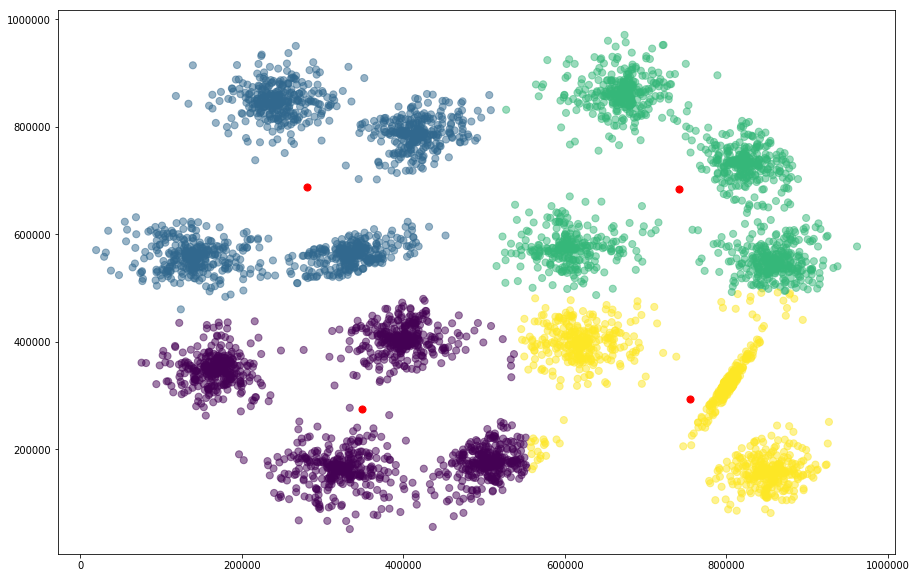

In [63]:
#PLOTA O CLUSTER REALIZADO NO DATASET
plt.scatter(dataset['V1'], dataset['V2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)